<h1 style="font-family: 'Times New Roman'; color: darkgreen">
<b> Asia Cup </b> </h1>


In [2]:
# Import Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<h2 style="font-family: 'Times New Roman';  color: black">
<b> 
Data Analysis Research Question 
</b> </h2>

<h5 style="font-family: 'Times New Roman'; color: black">
<b> Question:</b>  Does winning the toss increase chances of winning? </h5>





In [3]:
# Load Data
data = pd.read_csv('asiacup.csv', dtype={"Result": "string", "Toss": "string"})

In [4]:
# Unique Values in different variables
# This code goes through the entire dataset and prints the unique values for each of the variables.
# This is useful because I can see what the different variables and their datatypes are. This helps if I need to change anything.
# Useful in the cleaning process

variables = ["Toss", "Result", "Team", "Opponent", "Selection"]

for variable in variables:
    print(f"Unique values in {variable}:")
    print(data[variable].unique())
    print("\n")



Unique values in Toss:
<StringArray>
['Lose', 'Win', 'win']
Length: 3, dtype: string


Unique values in Result:
<StringArray>
['Lose', 'Win', 'win', 'No Result', ' Win D/L', ' Lose D/L']
Length: 6, dtype: string


Unique values in Team:
['Pakistan' 'Sri Lanka' 'India' 'Bangladesh' 'Hong Kong' 'UAE'
 'Afghanistan']


Unique values in Opponent:
['Sri Lanka' 'Pakistan' 'India' 'Bangladesh' 'Hong Kong' 'UAE'
 'Afghanistan']


Unique values in Selection:
['Batting' 'Bowling']




In [5]:
# First 5 Rows of the Data
# to see how the data looks like in terms of the columns and the values
data.head()

,Team,Opponent,Format,Ground,Year,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket,Player Of The Match,Result
0,Pakistan,Sri Lanka,ODI,Sharjah,1984,Lose,Batting,187.0,9.0,9.0,3.0,21.0,4.06,52.04,47.0,5.0,26.0,2.0,Roy Dias,Lose
1,Sri Lanka,Pakistan,ODI,Sharjah,1984,Win,Bowling,190.0,5.0,11.0,1.0,26.0,4.36,68.51,57.0,9.0,21.0,3.0,Roy Dias,Win
2,India,Sri Lanka,ODI,Sharjah,1984,Win,Bowling,97.0,0.0,9.0,0.0,14.0,4.47,60.48,51.0,10.0,8.0,3.0,Surinder Khanna,Win
3,Sri Lanka,India,ODI,Sharjah,1984,Lose,Batting,96.0,10.0,7.0,0.0,8.0,2.34,25.74,38.0,0.0,14.0,0.0,Surinder Khanna,Lose
4,India,Pakistan,ODI,Sharjah,1984,Win,Batting,188.0,4.0,13.0,3.0,17.0,4.08,60.21,56.0,10.0,5.0,3.0,Surinder Khanna,Win


#### **Data Cleaning**
* **data["Result"]**
    * look into what Win D/L and Lose D/L are --> *Maybe just change them all to either win or lose for simplicity?? and then change all the wins to 1 and all the lose to 0*
    * There are two wins (maybe make all variables lowercase to avoid confusion) DONE
    * Change the 'No Result' to Null? NOPE
* **data["Toss"]**
    * change all values to lowercase/uppercase because there is a conflicting win/Win

In [ ]:
# this is to generalize win/lose since there are different types in the dataset
# after researching, i found out that the outcome is the same (win/lose) regardless of the type (in this case- d/l)
data["Result"] = data["Result"].str.lower().replace(" win d/l", "win")
data["Result"] = data["Result"].str.lower().replace(" lose d/l", "lose")

In [ ]:
# This is part of data cleaning
# I am converting the values in the "Toss" column to lowercase and then converting them into an integer by mapping each lowercase value of win/lose to 1/0

data["Toss"] = data["Toss"].str.lower().map({
    "win": 1,
    "lose": 0
})



In [ ]:
# decided to get rid of the rows that had "no result" in their "Result" column
# this is to make the data more consistent and easier to analyze
# there are only two outcomes and no result does not really add value since there is no data associated with it that relates to the question
data = data[data["Result"] != "no result"]


In [ ]:
# this is to check all the unique values in the "Result" column before changing
data["Result"].unique()

<StringArray>
['lose', 'win']
Length: 2, dtype: string

In [ ]:
# this is similar to the "Toss" column where I converted the string values to integers by mapping win/lose to 1/0
# this makes it easier to figure out the output because I can just use .mean() to get the percentage (>.5 ==> win)

data["Result"] = data["Result"].str.lower().map({
    "win": 1,
    "lose": 0
})

In [ ]:
# Unique Values in different variables
# This code goes through the entire dataset and prints the unique values for each of the variables.
# This is useful because I can see what the different variables and their datatypes are. This helps if I need to change anything.
# Useful in the cleaning process
# double check if changes are reflected!!

variables = ["Toss", "Result", "Selection"]

for variable in variables:
    print(f"Unique values in {variable}:")
    print(data[variable].unique())
    print("\n")



Unique values in Toss:
[0 1]


Unique values in Result:
[0 1]


Unique values in Selection:
['Batting' 'Bowling']




In [ ]:
# to check data types so that i can do arithmetic operations on the "Toss" and "Result" columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 253
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Team                       250 non-null    object 
 1   Opponent                   250 non-null    object 
 2   Format                     250 non-null    object 
 3   Ground                     250 non-null    object 
 4   Year                       250 non-null    int64  
 5   Toss                       250 non-null    int64  
 6   Selection                  250 non-null    object 
 7   Run Scored                 250 non-null    float64
 8   Wicket Lost                250 non-null    float64
 9   Fours                      250 non-null    float64
 10  Sixes                      250 non-null    float64
 11  Extras                     250 non-null    float64
 12  Run Rate                   250 non-null    float64
 13  Avg Bat Strike Rate        250 non-null    float64
 14 

In [ ]:
# degbugging purposes --> changes are reflected in the "Result" column
data['Result'].unique()

array([0, 1])

In [ ]:
# debugging purposes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 253
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Team                       250 non-null    object 
 1   Opponent                   250 non-null    object 
 2   Format                     250 non-null    object 
 3   Ground                     250 non-null    object 
 4   Year                       250 non-null    int64  
 5   Toss                       250 non-null    int64  
 6   Selection                  250 non-null    object 
 7   Run Scored                 250 non-null    float64
 8   Wicket Lost                250 non-null    float64
 9   Fours                      250 non-null    float64
 10  Sixes                      250 non-null    float64
 11  Extras                     250 non-null    float64
 12  Run Rate                   250 non-null    float64
 13  Avg Bat Strike Rate        250 non-null    float64
 14 

<h1 style="font-family: 'Times New Roman';  color: blue"><b>India</b></h1>
<p style="font-family: 'Times New Roman';  color: black">Analyzing India's Game during the Asia Cups Cricket<p>

In [ ]:
# Filter to just India 
# stored in a new variable so that I can compare two different countries without the data overriding or anything

India_data = data.loc[data['Team'] == 'India']

In [ ]:
# to see how large the dataset is for just India
India_data.shape

(57, 20)

In [ ]:
# to make sure its just India
print(India_data)

      Team     Opponent Format        Ground  Year  Toss Selection  \
2    India    Sri Lanka    ODI       Sharjah  1984     1   Bowling   
4    India     Pakistan    ODI       Sharjah  1984     1   Batting   
17   India   Bangladesh    ODI    Chattogram  1988     1   Bowling   
18   India    Sri Lanka    ODI         Dhaka  1988     1   Bowling   
22   India     Pakistan    ODI         Dhaka  1988     1   Bowling   
26   India    Sri Lanka    ODI         Dhaka  1988     1   Bowling   
28   India   Bangladesh    ODI    Chandigarh  1990     0   Bowling   
30   India    Sri Lanka    ODI       Cuttack  1990     0   Bowling   
34   India    Sri Lanka    ODI       Kolkata  1991     1   Bowling   
37   India   Bangladesh    ODI       Sharjah  1995     0   Bowling   
40   India     Pakistan    ODI       Sharjah  1995     0   Bowling   
44   India    Sri Lanka    ODI       Sharjah  1995     0   Bowling   
48   India    Sri Lanka    ODI       Sharjah  1995     1   Bowling   
55   India    Sri La

In [ ]:
# to see the count and percentage of wins for India based on whether they won or lost the toss
India_data.groupby("Toss")["Result"].agg(["count", "mean"])

,count,mean
Toss,,
0,32,0.5625
1,25,0.8400


In [19]:
# P(Win | Toss outcome AND Selection)
India_data.groupby(["Toss", "Selection"])["Result"].mean().reset_index()

,Toss,Selection,Result
0,0,Batting,0.416667
1,0,Bowling,0.650000
2,1,Batting,0.714286
3,1,Bowling,0.888889


In [ ]:
# to see the count and percentage of wins for India based on whether they won or lost the toss and their selection
India_data.groupby(["Toss", "Selection"])["Result"].agg(["count", "mean"])

count      mean
Toss Selection                 
0    Batting       12  0.416667
     Bowling       20  0.650000
1    Batting        7  0.714286
     Bowling       18  0.888889

In [ ]:
# to see the count and percentage of wins for India based on whether they won or lost the toss and their selection in a crosstab format
table_India = pd.crosstab(India_data["Toss"], India_data["Result"], normalize="index")
table_India

Result,0,1
Toss,,
0,0.4375,0.5625
1,0.1600,0.8400


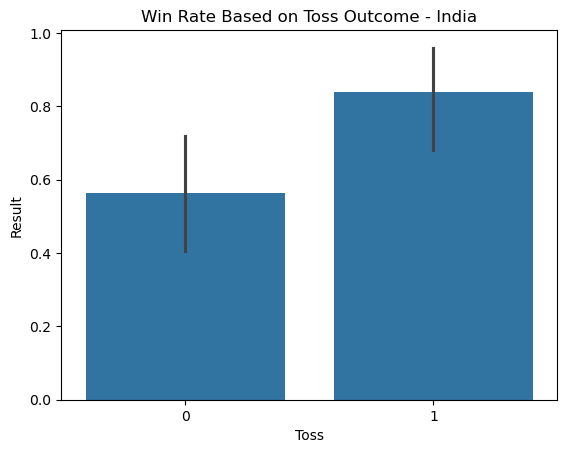

In [ ]:
# to visualize the win rate based on toss outcome for India using a bar plot
sns.barplot(
    x="Toss",
    y="Result",
    data=India_data
)

plt.title("Win Rate Based on Toss Outcome - India")
plt.show()

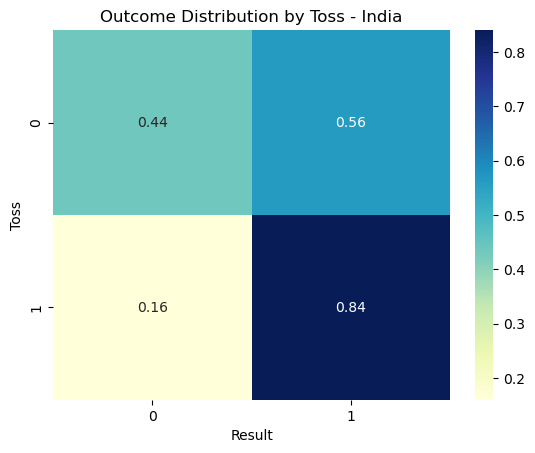

In [ ]:
# to visualize the win rate based on toss outcome for India using a heatmap
sns.heatmap(table_India, annot=True, cmap="YlGnBu")
plt.title("Outcome Distribution by Toss - India")
plt.show()

In [ ]:
# to see the unique values in the "Result" column for India
India_data["Result"].unique()

array([1, 0])

In [ ]:
# debugging purposes
India_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 2 to 249
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Team                       57 non-null     object 
 1   Opponent                   57 non-null     object 
 2   Format                     57 non-null     object 
 3   Ground                     57 non-null     object 
 4   Year                       57 non-null     int64  
 5   Toss                       57 non-null     int64  
 6   Selection                  57 non-null     object 
 7   Run Scored                 57 non-null     float64
 8   Wicket Lost                57 non-null     float64
 9   Fours                      57 non-null     float64
 10  Sixes                      57 non-null     float64
 11  Extras                     57 non-null     float64
 12  Run Rate                   57 non-null     float64
 13  Avg Bat Strike Rate        57 non-null     float64
 14  

<h1 style="font-family: 'Times New Roman';  color: green"><b>Pakistan</b></h1>
<p style="font-family: 'Times New Roman';  color: black">Analyzing Pakistan's Game during the Asia Cups Cricket<p>

In [26]:
# Filter to just Pakistan 

Pakistan_data = data.loc[data['Team'] == 'Pakistan']


print(Pakistan_data)


         Team     Opponent Format        Ground  Year  Toss Selection  \
0    Pakistan    Sri Lanka    ODI       Sharjah  1984     0   Batting   
5    Pakistan        India    ODI       Sharjah  1984     0   Bowling   
7    Pakistan    Sri Lanka    ODI  Colombo(PSS)  1986     0   Batting   
9    Pakistan   Bangladesh    ODI      Moratuwa  1986     1   Bowling   
13   Pakistan    Sri Lanka    ODI  Colombo(SSC)  1986     0   Batting   
14   Pakistan    Sri Lanka    ODI         Dhaka  1988     0   Batting   
21   Pakistan   Bangladesh    ODI    Chattogram  1988     1   Batting   
23   Pakistan        India    ODI         Dhaka  1988     0   Batting   
41   Pakistan        India    ODI       Sharjah  1995     1   Batting   
43   Pakistan   Bangladesh    ODI       Sharjah  1995     0   Bowling   
46   Pakistan    Sri Lanka    ODI       Sharjah  1995     0   Batting   
51   Pakistan    Sri Lanka    ODI  Colombo(RPS)  1997     1   Bowling   
53   Pakistan   Bangladesh    ODI  Colombo(RPS)  19

In [ ]:
# to see how large the dataset is for just Pakistan
Pakistan_data.shape

(54, 20)

In [28]:
# P(Win | Toss outcome AND Selection)
Pakistan_data.groupby(["Toss", "Selection"])["Result"].mean().reset_index()

,Toss,Selection,Result
0,0,Batting,0.384615
1,0,Bowling,0.714286
2,1,Batting,0.578947
3,1,Bowling,0.625000


In [ ]:
# to see the count and percentage of wins for Pakistan based on whether they won or lost the toss and their selection
Pakistan_data.groupby("Toss")["Result"].agg(["count", "mean"])

,count,mean
Toss,,
0,27,0.555556
1,27,0.592593


In [ ]:
# to see the count and percentage of wins for Pakistan based on whether they won or lost the toss and their selection
Pakistan_data.groupby(["Toss", "Selection"])["Result"].agg(["count", "mean"])

count      mean
Toss Selection                 
0    Batting       13  0.384615
     Bowling       14  0.714286
1    Batting       19  0.578947
     Bowling        8  0.625000

In [ ]:
# to see the count and percentage of wins for Pakistan based on whether they won or lost the toss and their selection in a crosstab format
table_Pakistan = pd.crosstab(Pakistan_data["Toss"], Pakistan_data["Selection"], normalize="index")
table_Pakistan

Selection,Batting,Bowling
Toss,,
0,0.481481,0.518519
1,0.703704,0.296296


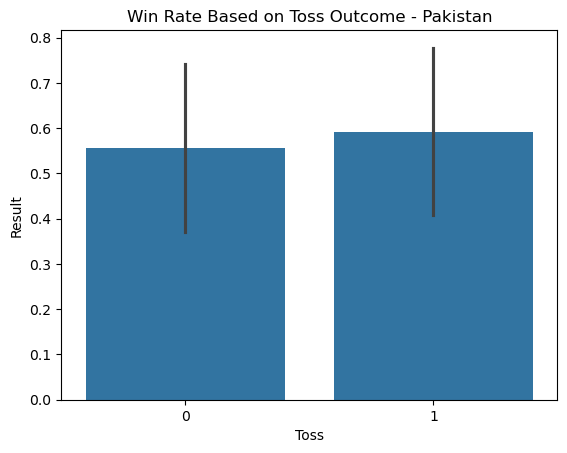

In [ ]:
# to visualize the win rate based on toss outcome for Pakistan using a bar plot
sns.barplot(
    x="Toss",
    y="Result",
    data=Pakistan_data
)

plt.title("Win Rate Based on Toss Outcome - Pakistan")
plt.show()

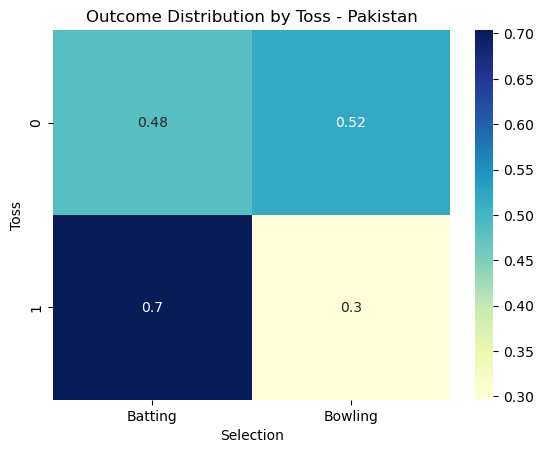

In [ ]:
# to visualize the win rate based on toss outcome for Pakistan using a heatmap
sns.heatmap(table_Pakistan, annot=True, cmap="YlGnBu")
plt.title("Outcome Distribution by Toss - Pakistan")
plt.show()